## Load and Compare Retrieval Results 

This section loads the CSVs produced by both retrieval methods — TF-IDF and LLM — where each **resume** is used to retrieve **top-matching jobs**.

### What We Compare:
- **Overlap in Top-*k* Jobs per Resume**
- **Agreement Percentage between TF-IDF and LLM**

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
# Load both results (resume-to-job matches)
tfidf_df = pd.read_csv("../notebooks/tfidf_resume_to_jobs.csv")
llm_df = pd.read_csv("../notebooks/llm_resume_to_jobs.csv")

In [18]:
# Parse and Clean Scores
tfidf_df['TFIDF_Score'] = pd.to_numeric(tfidf_df['TFIDF_Score'], errors='coerce')
llm_df['LLM_Score'] = pd.to_numeric(llm_df['LLM_Score'], errors='coerce')

In [20]:
overlap_summary = []
resume_ids = sorted(set(tfidf_df['Resume_ID']) & set(llm_df['Resume_ID']))

for resume_id in resume_ids:
    tfidf_subset = tfidf_df[tfidf_df['Resume_ID'] == resume_id]
    llm_subset = llm_df[llm_df['Resume_ID'] == resume_id]
    
    tfidf_jobs = set(tfidf_subset['Matched_Job_ID'].tolist())
    llm_jobs = set(llm_subset['Matched_Job_ID'].tolist())

    overlap = tfidf_jobs & llm_jobs
    overlap_count = len(overlap)

    overlap_summary.append({
        'Resume_ID': resume_id,
        'TFIDF Top-K': len(tfidf_jobs),
        'LLM Top-K': len(llm_jobs),
        'Overlap Count': overlap_count,
        'Overlap %': round(overlap_count / 10 * 100, 1)
    })

In [22]:
# Display as DataFrame
comparison_df = pd.DataFrame(overlap_summary)
print("=== TF-IDF vs LLM Retrieval Overlap Summary ===")
print(comparison_df.to_string(index=False))

=== TF-IDF vs LLM Retrieval Overlap Summary ===
 Resume_ID  TFIDF Top-K  LLM Top-K  Overlap Count  Overlap %
  10089434           10         10              2       20.0
  10247517           10         10              1       10.0
  10265057           10         10              0        0.0
  10553553           10         10              1       10.0
  10641230           10         10              0        0.0
  10839851           10         10              0        0.0
  10840430           10         10              1       10.0
  11580408           10         10              1       10.0
  11584809           10         10              2       20.0
  11957080           10         10              0        0.0
  12045067           10         10              1       10.0
  12334140           10         10              0        0.0
  12635195           10         10              0        0.0
  12763627           10         10              1       10.0
  13385306           10         10   

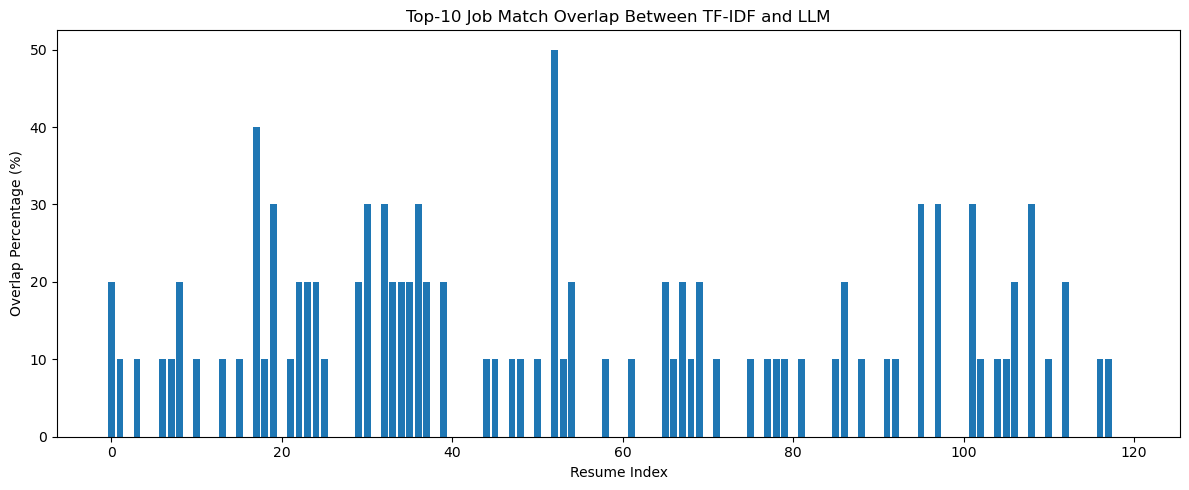

In [34]:
plt.figure(figsize=(12, 5))
plt.bar(range(len(comparison_df)), comparison_df['Overlap %'])

plt.xlabel('Resume Index')
plt.ylabel('Overlap Percentage (%)')
plt.title('Top-10 Job Match Overlap Between TF-IDF and LLM')
plt.tight_layout()
plt.show()

In [36]:
def compute_retrieval_overlap_metrics(tfidf_path, llm_path, top_k=10):
    """
    Computes overall retrieval comparison metrics between TF-IDF and LLM-based methods.

    Returns a dictionary with average overlap percentage, average TF-IDF score, and average LLM score.
    """

    tfidf_df = pd.read_csv(tfidf_path)
    llm_df = pd.read_csv(llm_path)

    tfidf_df['TFIDF_Score'] = pd.to_numeric(tfidf_df['TFIDF_Score'], errors='coerce')
    llm_df['LLM_Score'] = pd.to_numeric(llm_df['LLM_Score'], errors='coerce')

    resume_ids = sorted(set(tfidf_df['Resume_ID']) & set(llm_df['Resume_ID']))
    results = []

    for resume_id in resume_ids:
        tfidf_jobs = set(tfidf_df[tfidf_df['Resume_ID'] == resume_id]['Matched_Job_ID'])
        llm_jobs = set(llm_df[llm_df['Resume_ID'] == resume_id]['Matched_Job_ID'])
        overlap = tfidf_jobs & llm_jobs

        results.append({
            'overlap_pct': len(overlap) / top_k * 100,
            'avg_tfidf': tfidf_df[tfidf_df['Resume_ID'] == resume_id]['TFIDF_Score'].mean(),
            'avg_llm': llm_df[llm_df['Resume_ID'] == resume_id]['LLM_Score'].mean()
        })

    # Aggregate metrics
    avg_overlap_pct = sum(r['overlap_pct'] for r in results) / len(results)
    avg_tfidf_score = sum(r['avg_tfidf'] for r in results) / len(results)
    avg_llm_score = sum(r['avg_llm'] for r in results) / len(results)

    return {
        'Average_Overlap_Percentage': round(avg_overlap_pct, 2),
        'Average_TFIDF_Score': round(avg_tfidf_score, 4),
        'Average_LLM_Score': round(avg_llm_score, 4)
    }


In [38]:
metrics = compute_retrieval_overlap_metrics(
    tfidf_path="../notebooks/tfidf_resume_to_jobs.csv",
    llm_path="../notebooks/llm_resume_to_jobs.csv"
)
print(metrics)

{'Average_Overlap_Percentage': 8.75, 'Average_TFIDF_Score': 0.3402, 'Average_LLM_Score': 0.5942}
